
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [3]:

import numpy as np
import matplotlib.pyplot as plt


In [11]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        pass
        X=np.array(X,dtype=float)
        self.mean_=np.mean(X,axis=0)
        self.std_=np.std(X,axis=0)
        self.std_[self.std_==0]=1
        return self

    def transform(self, X):
        pass
        return (X-self.mean_)/self.std_

    def fit_transform(self, X):
        pass
        return self.fit(X).transform(X)


In [14]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        pass
        X=np.array(X,dtype=float)
        y=np.array(y,dtype=float)
        n,d=X.shape
        self.w=np.zeros(d)
        self.b=0
        self.losses=[]
        for i in range(self.epochs):
          y_pred=X@self.w+self.b
          error=y_pred-y
          loss=1/(2*n)*np.sum(error**2)+self.l2_lambda*np.sum(self.w**2)
          self.losses.append(loss)
          dw=1/n*X.T@error+self.l2_lambda*self.w
          db=1/n*np.sum(error)
          self.w-=self.lr*dw
          self.b-=self.lr*db
        return self

    def predict(self, X):
        pass
        X = np.array(X, dtype=float)
        return X @ self.w + self.b


In [7]:
import pandas as pd
def loadcsv(path, target_column):
    data = pd.read_csv(path)
    X = data.drop(columns=[target_column]).values
    y = data[target_column].values
    return X, y


In [8]:
X_train, y_train = loadcsv(
    "sample_data/california_housing_train.csv",
    target_column="median_house_value"
)

X_test, y_test = loadcsv(
    "sample_data/california_housing_test.csv",
    target_column="median_house_value"
)

In [13]:
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
model = LinearRegressionManual(
    lr=0.01,
    epochs=1000,
    l2_lambda=0.1
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

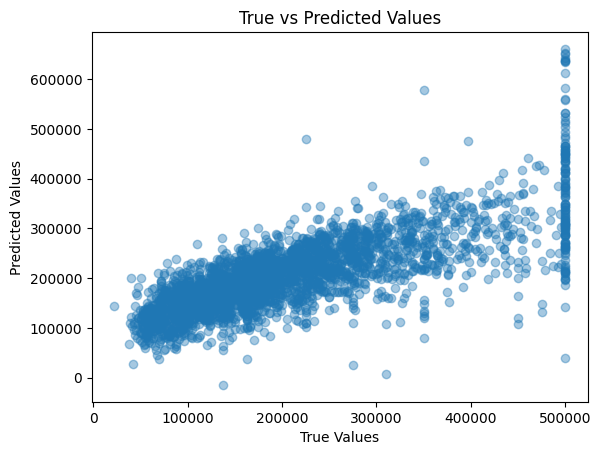

In [20]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

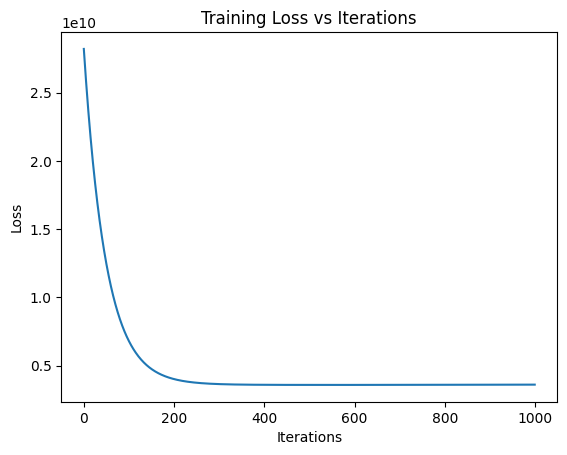

In [21]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [18]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    pass
    ans=1/(1+np.exp(-z))
    return ans


In [30]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        pass
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
    def fit(self, X, y):
        pass
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        n, d = X.shape
        self.W = np.zeros(d)
        self.b = 0
        self.losses = []
        for i in range(self.epochs):
            val=X @ self.W + self.b
            y_pred = sigmoid(val)
            error = y_pred - y
            loss = (-1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            self.losses.append(loss)
            dw = (1 / n) * X.T @ error + self.l2_lambda * self.W
            db = (1 / n) * np.sum(error)
            self.W -= self.lr * dw
            self.b -= self.lr * db
        return self

    def predict_proba(self, X):
        pass
        return sigmoid(X @ self.W + self.b)

    def predict(self, X,threshold=0.5):
        pass
        return (self.predict_proba(X) >= threshold).astype(int)


In [23]:
def load_mnist_binary(path):
    data = pd.read_csv(path)
    X = data.iloc[:, 1:].values
    y = data.iloc[:, 0].values
    y = (y == 0).astype(int)
    return X, y


In [24]:
X_train, y_train = load_mnist_binary("sample_data/mnist_train_small.csv")
X_test, y_test = load_mnist_binary("sample_data/mnist_test.csv")

In [26]:
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_train_scaled, y_train)


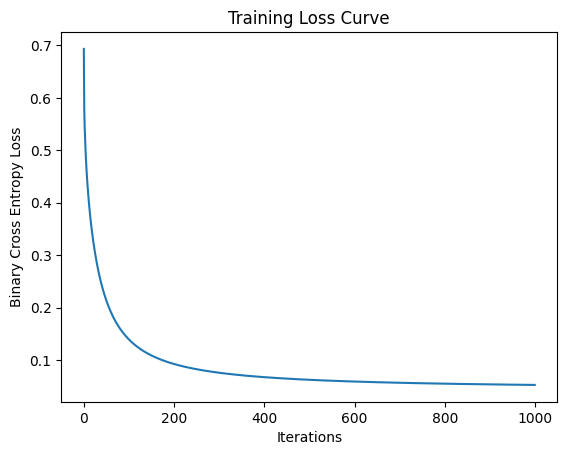

In [32]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

In [31]:
y_pred = model.predict(X_test_scaled, threshold=0.5)
accuracy = (y_pred == y_test).mean()
print("Final Test Accuracy:", accuracy)

Final Test Accuracy: 0.9884988498849885



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [36]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
import numpy as np
class KMeansMatrix:
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    pass
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, M):
        M = np.array(M, dtype=float)
        n, m = M.shape
        values = M.flatten()
        self.centroids = np.random.choice(values, self.k, replace=False)

        for _ in range(self.max_iters):
            distances = np.abs(values[:, None] - self.centroids[None, :])
            labels = np.argmin(distances, axis=1)
            new_centroids = np.array([
                values[labels == i].mean() if np.any(labels == i) else self.centroids[i]
                for i in range(self.k)
            ])
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        assignment_table = labels.reshape(n, m)

        cookbook = {i: [] for i in range(self.k)}
        for idx, label in enumerate(labels):
            i = idx // m
            j = idx % m
            cookbook[label].append((i, j))

        return assignment_table, cookbook, self.centroids


In [34]:
def load_single_mnist_matrix(path, index=0):
    df = pd.read_csv(path)
    M = df.iloc[index, 1:].values.reshape(28, 28)
    return M

In [37]:
M = load_single_mnist_matrix("sample_data/mnist_train_small.csv", index=0)
print(M.shape)
kmeans = KMeansMatrix(k=3)

assignment_table, cookbook, centroids = kmeans.fit(M)

(28, 28)


In [38]:
for c in cookbook:
    print(f"Cluster {c}: {len(cookbook[c])} elements")

Cluster 0: 91 elements
Cluster 1: 33 elements
Cluster 2: 660 elements


In [39]:
print("Centroids:", centroids)

Centroids: [225.48351648 107.87878788   1.28484848]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
